In [1]:
import kagglehub
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\divya\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams["figure.figsize"] = (8,4)
color = ['cyan', 'red']

In [4]:
df = pd.read_csv('telco_customer_churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


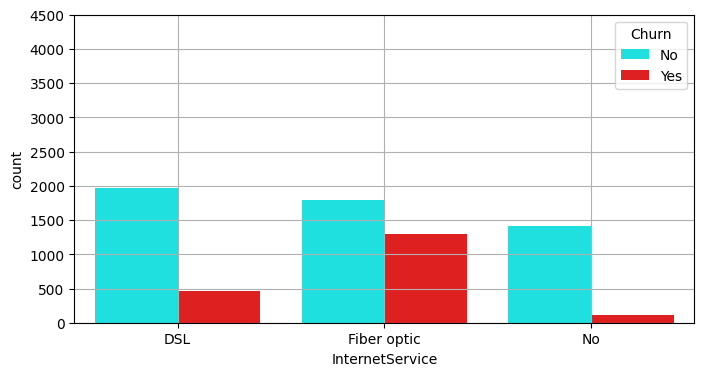

In [8]:
sns.countplot(hue = 'Churn', x = 'InternetService', data = df, palette = color)
plt.grid(True)
plt.yticks(ticks = range(0, 5000, 500))
plt.show()

Fibre Optic is more expensive than the DSL thats why people churned the most taking Fibre optic, and those who are not taking the internet service they are not paying anything, and hence they less likely to be churned.

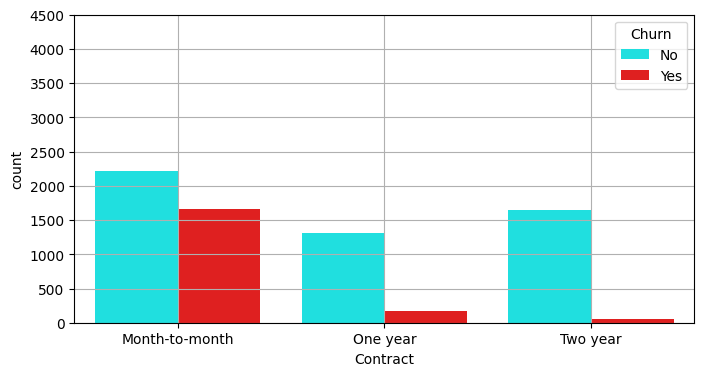

In [9]:
sns.countplot(hue = 'Churn', x = 'Contract', data = df, palette = color)
plt.grid(True)
plt.yticks(ticks = range(0, 5000, 500))
plt.show()

People with Month-to-Month churnde the most because they can easyly switch providers without any penalties or long-term commitments

In [10]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

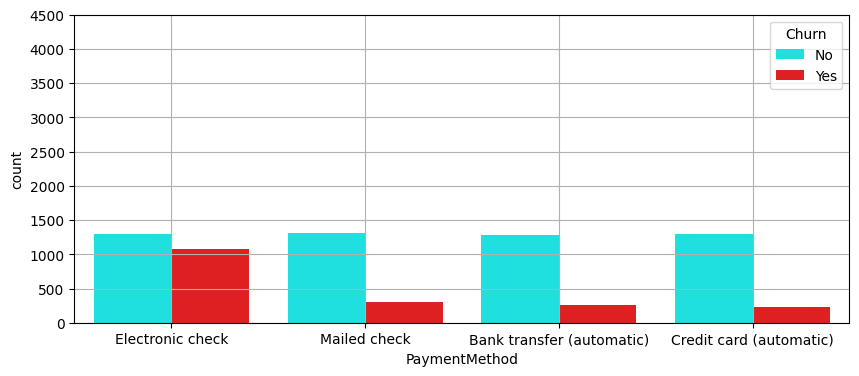

In [11]:
plt.figure(figsize = (10, 4))
sns.countplot(hue = 'Churn', x = 'PaymentMethod', data = df, palette = color)
plt.grid(True)
plt.yticks(ticks = range(0, 5000, 500))
plt.show()

Encoding The Data

In [12]:
en_data1 = df[['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',
'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
'PaperlessBilling','InternetService', 'PaymentMethod','gender']]

In [13]:
dummy_data1 = pd.get_dummies(en_data1, drop_first = True)

In [14]:
dummy_df1 = pd.concat([dummy_data1, df],axis = 1)

In [15]:
dummy_df1.head()

,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,True,False,False,True,False,False,False,False,True,False,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,False,False,True,False,False,False,True,False,False,False,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,False,False,True,False,False,False,True,False,True,False,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,False,False,False,True,False,False,True,False,False,False,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,False,False,True,False,False,False,False,False,False,False,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
dummy_df1.drop(columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',
'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
'PaperlessBilling','InternetService', 'PaymentMethod','gender'], inplace = True)

In [17]:
dummy_df1['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
order = [['Month-to-month', 'One year', 'Two year']]

In [20]:
oe = OrdinalEncoder(categories = order)
oe.fit(dummy_df1[['Contract']])

OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])

In [21]:
dummy_df1['New_Contract'] = oe.transform(dummy_df1[['Contract']])

In [22]:
dummy_df1.drop(columns = ['Contract'], inplace = True)

In [23]:
dummy_df1['TotalCharges'] = dummy_df1['TotalCharges'].str.strip()

In [24]:
dummy_df1['TotalCharges'].replace('', pd.NA, inplace = True)

In [25]:
dummy_df1.dropna(inplace = True)

In [26]:
dummy_df1['TotalCharges'] = dummy_df1['TotalCharges'].astype('float')

In [27]:
dummy_df1['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

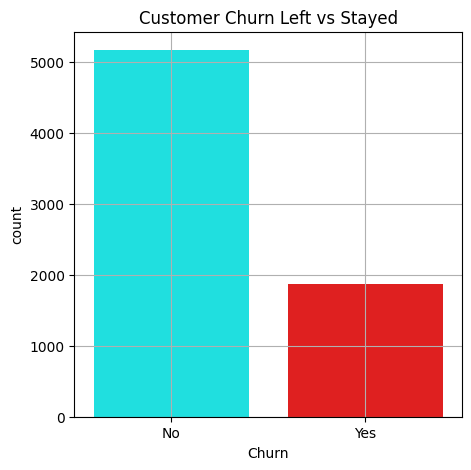

In [28]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'Churn', data = dummy_df1,hue = 'Churn', palette = color)
plt.grid(True)
plt.title('Customer Churn Left vs Stayed')
plt.show()

In [29]:
dummy_df1.columns

Index(['Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'customerID', 'SeniorCitizen', 'tenure',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'New_Contract'],
      dtype='object')

In [30]:
dummy_df1.drop(columns = ['customerID'],inplace = True)

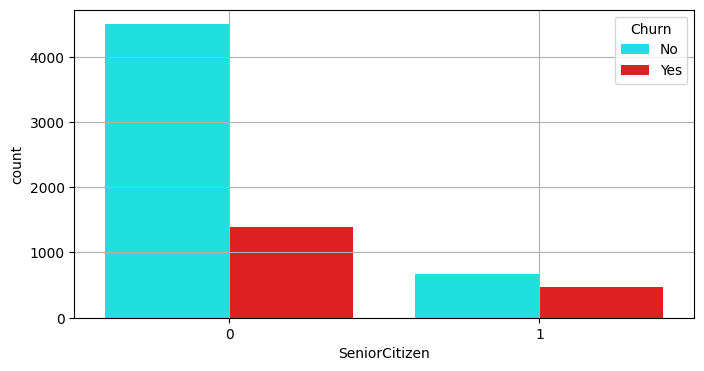

In [31]:
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data = dummy_df1, palette = color)
plt.grid(True)
plt.show()

In [32]:
dummy_df1.columns

Index(['Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'New_Contract'],
      dtype='object')

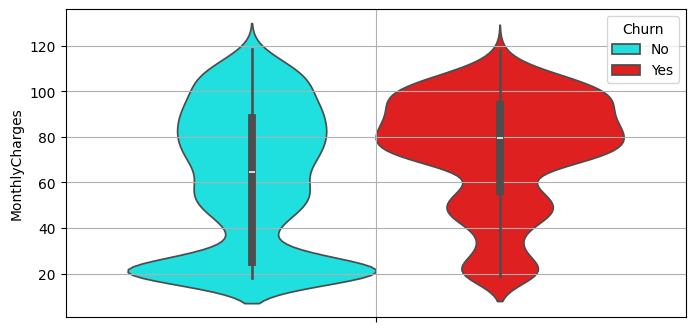

In [33]:
sns.violinplot(hue = 'Churn', y = 'MonthlyCharges', data = dummy_df1, palette = color )
plt.grid(True)
plt.show()

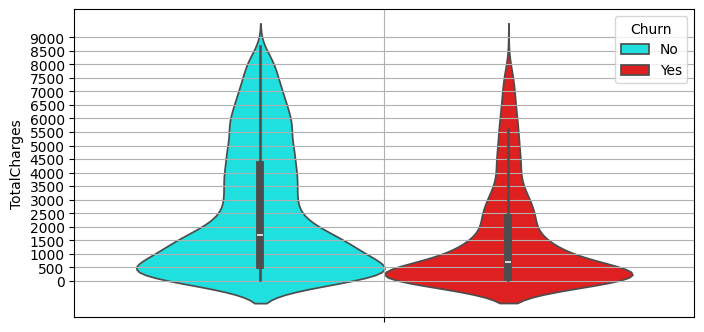

In [34]:
sns.violinplot(hue = 'Churn', y = 'TotalCharges', data = dummy_df1, palette = color)
plt.yticks(ticks = range(0,9001,500))
plt.grid(True)
plt.show()

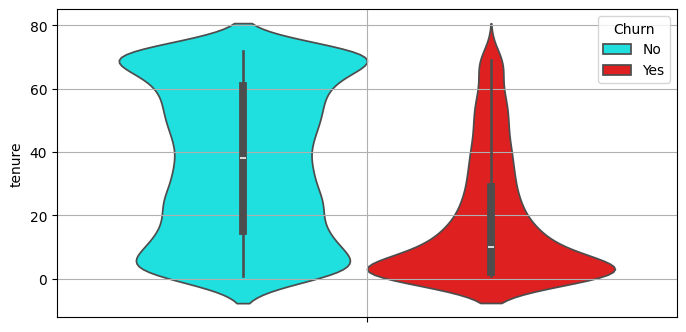

In [35]:
sns.violinplot(hue = 'Churn', y = 'tenure', data = dummy_df1, palette = color)
plt.grid(True)
plt.show()

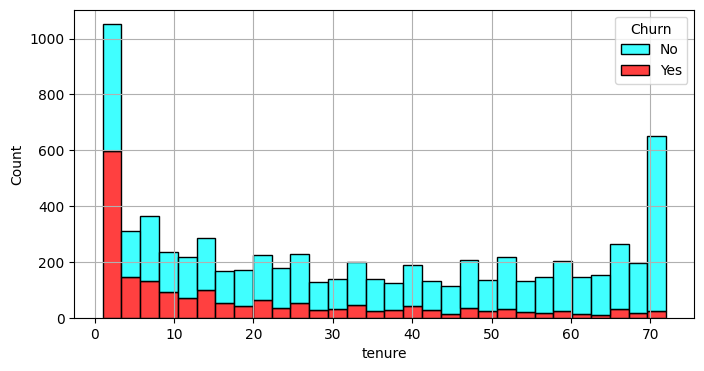

In [36]:
sns.histplot(x = 'tenure', hue = 'Churn', data = dummy_df1, multiple = 'stack', bins = 30, palette = color)
plt.grid(True)
plt.show()

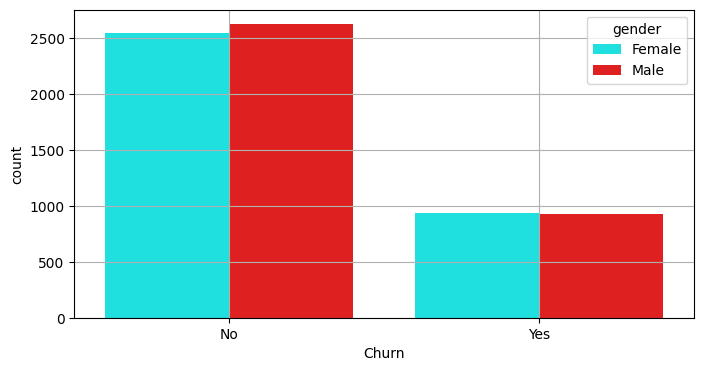

In [37]:
sns.countplot(x = 'Churn', hue = 'gender', data = df, palette = color)
plt.grid(True)
plt.show()

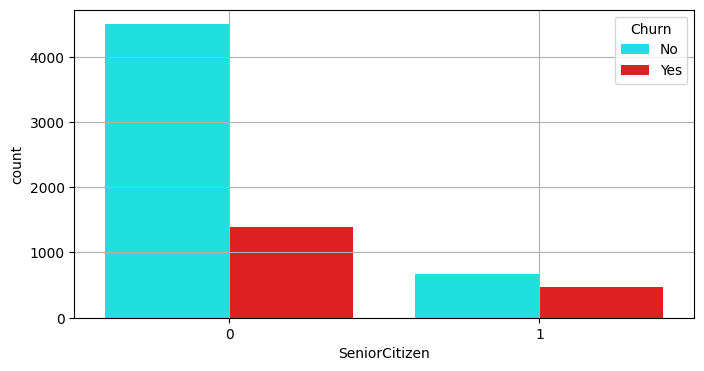

In [38]:
sns.countplot(data = dummy_df1, x = 'SeniorCitizen', hue = 'Churn', palette = color)
plt.grid(True)
plt.show()

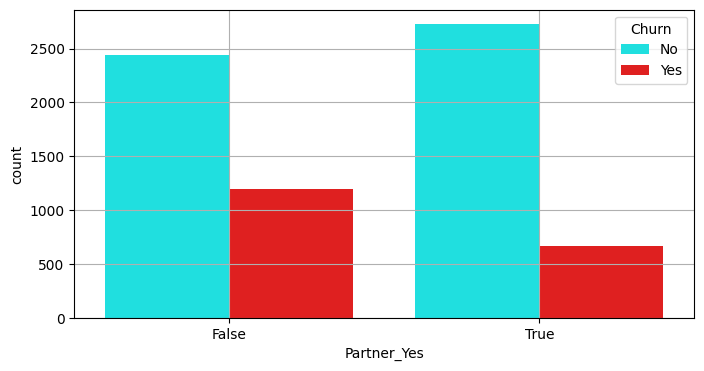

In [39]:
sns.countplot(data = dummy_df1, x = 'Partner_Yes', hue = 'Churn',palette = color)
plt.grid(True)
plt.show()

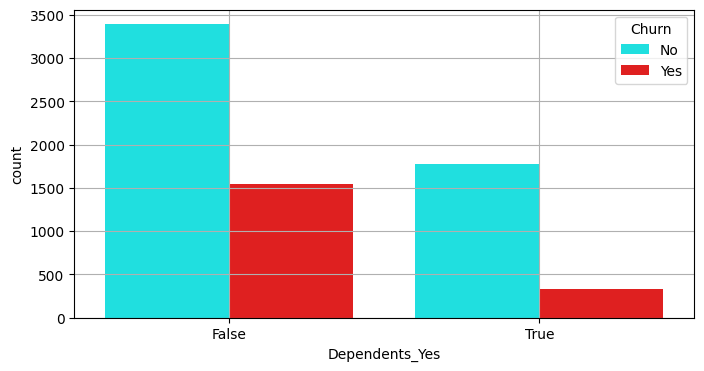

In [40]:
sns.countplot(hue = 'Churn', x = 'Dependents_Yes', data = dummy_df1, palette = color)
plt.grid(True)
plt.show()

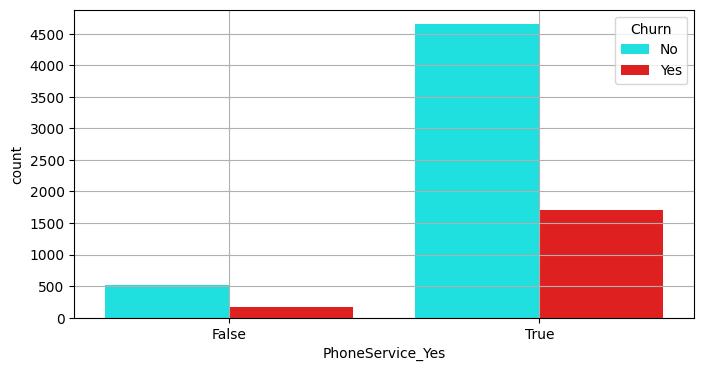

In [41]:
sns.countplot(hue = 'Churn', x = 'PhoneService_Yes', data = dummy_df1, palette = color)
plt.grid(True)
plt.yticks(ticks = range(0, 5000, 500))
plt.show()

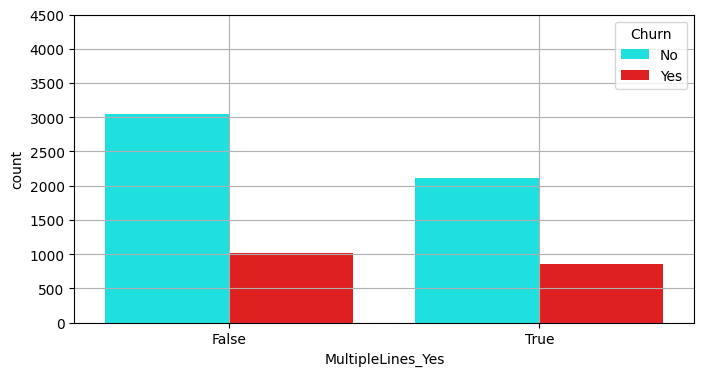

In [42]:
sns.countplot(hue = 'Churn', x = 'MultipleLines_Yes', data = dummy_df1, palette = color)
plt.grid(True)
plt.yticks(ticks = range(0, 5000, 500))
plt.show()

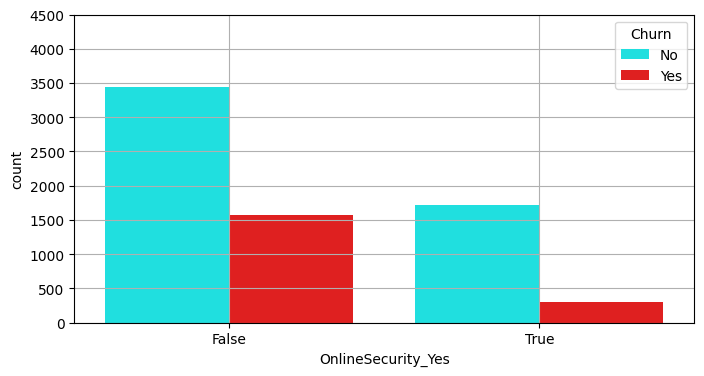

In [43]:
sns.countplot(hue = 'Churn', x = 'OnlineSecurity_Yes', data = dummy_df1, palette = color)
plt.grid(True)
plt.yticks(ticks = range(0, 5000, 500))
plt.show()

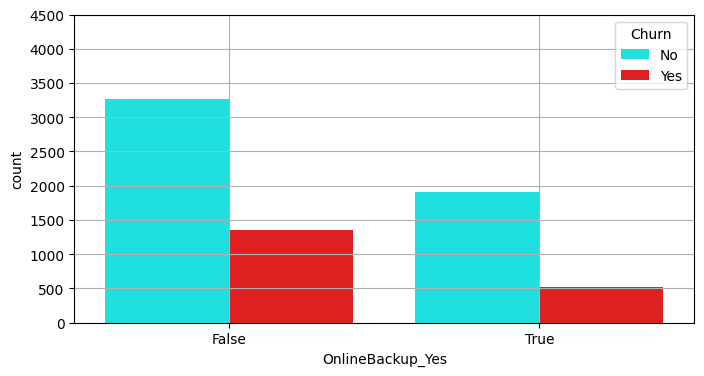

In [44]:
sns.countplot(hue = 'Churn', x = 'OnlineBackup_Yes', data = dummy_df1, palette = color)
plt.grid(True)
plt.yticks(ticks = range(0, 5000, 500))
plt.show()

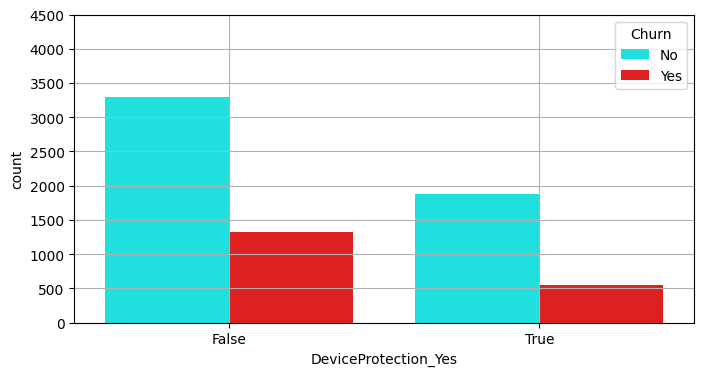

In [45]:
sns.countplot(hue = 'Churn', x = 'DeviceProtection_Yes', data = dummy_df1, palette = color)
plt.grid(True)
plt.yticks(ticks = range(0, 5000, 500))
plt.show()

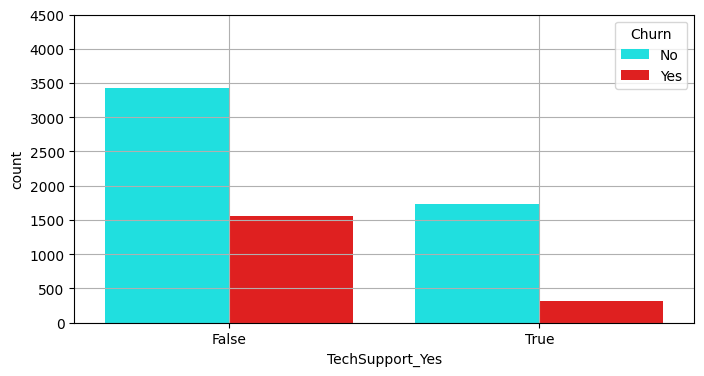

In [46]:
sns.countplot(hue = 'Churn', x = 'TechSupport_Yes', data = dummy_df1, palette = color)
plt.grid(True)
plt.yticks(ticks = range(0, 5000, 500))
plt.show()

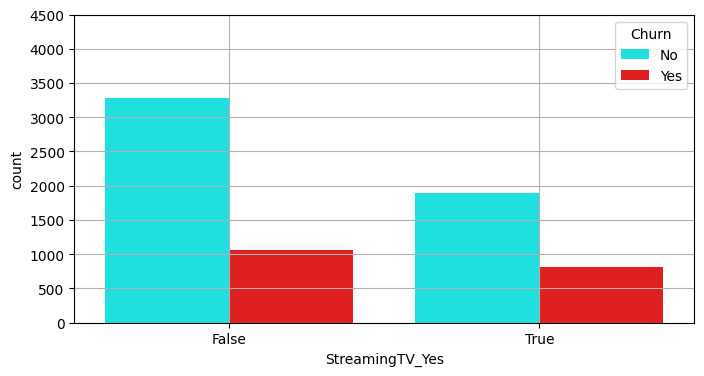

In [47]:
sns.countplot(hue = 'Churn', x = 'StreamingTV_Yes', data = dummy_df1, palette = color)
plt.grid(True)
plt.yticks(ticks = range(0, 5000, 500))
plt.show()

In [48]:
#      
#  
#         
# 
#   
# dtype: int64

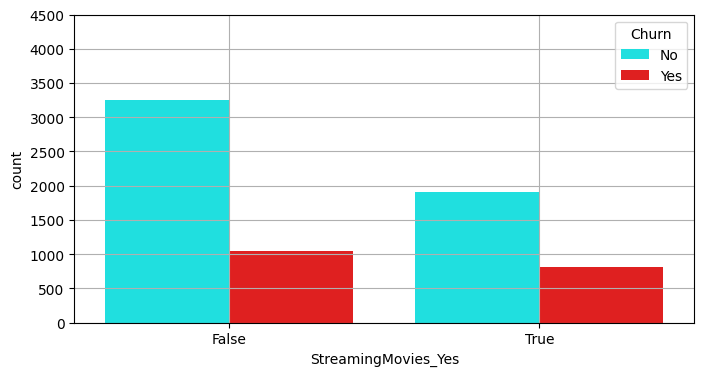

In [49]:
sns.countplot(hue = 'Churn', x = 'StreamingMovies_Yes', data = dummy_df1, palette = color)
plt.grid(True)
plt.yticks(ticks = range(0, 5000, 500))
plt.show()

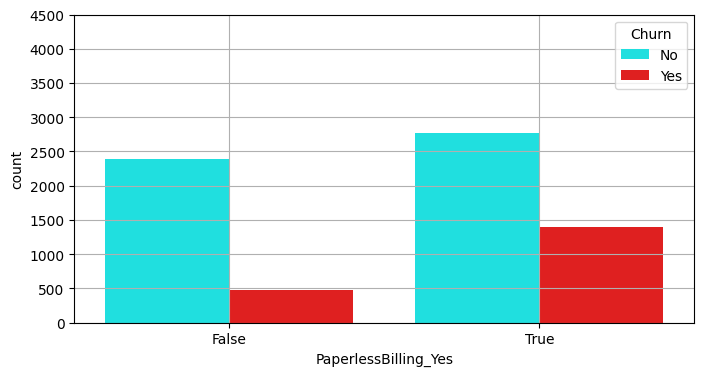

In [50]:
sns.countplot(hue = 'Churn', x = 'PaperlessBilling_Yes', data = dummy_df1, palette = color)
plt.grid(True)
plt.yticks(ticks = range(0, 5000, 500))
plt.show()

In [51]:
dummy_df1.columns

Index(['Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'New_Contract'],
      dtype='object')

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder() 
le.fit(dummy_df1['Churn'])

LabelEncoder()

In [54]:
dummy_df1['Churn'] = le.transform(dummy_df1['Churn'])

In [55]:
dummy_df1

,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,New_Contract
0,True,False,False,True,False,False,False,False,True,False,...,False,True,False,False,0,1,29.85,29.85,0,0.0
1,False,False,True,False,False,False,True,False,False,False,...,False,False,True,True,0,34,56.95,1889.50,0,1.0
2,False,False,True,False,False,False,True,False,True,False,...,False,False,True,True,0,2,53.85,108.15,1,0.0
3,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,0,45,42.30,1840.75,0,1.0
4,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,0,2,70.70,151.65,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,True,True,True,False,True,False,True,False,False,False,...,False,False,True,True,0,24,84.80,1990.50,0,1.0
7039,True,True,True,False,True,False,False,False,True,False,...,True,False,False,False,0,72,103.20,7362.90,0,1.0
7040,True,True,False,True,False,False,True,False,False,False,...,False,True,False,False,0,11,29.60,346.45,0,0.0
7041,True,False,True,False,True,False,False,False,False,False,...,False,False,True,True,1,4,74.40,306.60,1,0.0


In [56]:
dummy_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Partner_Yes                            7032 non-null   bool   
 1   Dependents_Yes                         7032 non-null   bool   
 2   PhoneService_Yes                       7032 non-null   bool   
 3   MultipleLines_No phone service         7032 non-null   bool   
 4   MultipleLines_Yes                      7032 non-null   bool   
 5   OnlineSecurity_No internet service     7032 non-null   bool   
 6   OnlineSecurity_Yes                     7032 non-null   bool   
 7   OnlineBackup_No internet service       7032 non-null   bool   
 8   OnlineBackup_Yes                       7032 non-null   bool   
 9   DeviceProtection_No internet service   7032 non-null   bool   
 10  DeviceProtection_Yes                   7032 non-null   bool   
 11  TechSuppo

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x = dummy_df1.drop(columns = ['Churn'], axis = 1)
y = dummy_df1.iloc[:,-2]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state = 42)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [62]:
lr.score(X_test , y_test)*100

78.89125799573561

In [63]:
lr.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [65]:
fs = SequentialFeatureSelector(lr, k_features = 6,forward=True)
fs.fit(x,y)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=500),
                          k_features=(6, 6), scoring='accuracy')

In [66]:
fs.k_score_*100

80.10484056045722

In [67]:
fs.k_feature_names_

('PhoneService_Yes',
 'MultipleLines_Yes',
 'StreamingMovies_Yes',
 'InternetService_Fiber optic',
 'PaymentMethod_Electronic check',
 'tenure')

In [68]:
x1 = dummy_df1[['PhoneService_Yes','MultipleLines_Yes','StreamingMovies_Yes','InternetService_Fiber optic','PaymentMethod_Electronic check','tenure']]
y1 = dummy_df1['Churn']

In [69]:
from imblearn.under_sampling import RandomUnderSampler

In [70]:
ro = RandomUnderSampler()
ro_x,ro_y = ro.fit_resample(x1,y1)

In [71]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(ro_x,ro_y, test_size = 0.2, random_state = 42)

In [72]:
lr1 = LogisticRegression()
lr1.fit(X_train1,y_train1)

LogisticRegression()

In [73]:
lr1.score(X_test1,y_test1)*100

75.66844919786097

In [74]:
from sklearn.metrics import log_loss

In [75]:
y_true = dummy_df1['Churn'].values
y_pred = lr1.predict_proba(X_test1)[:, 1]

In [76]:
loss = log_loss(y_test1, y_pred)

In [77]:
print(loss*100)

49.08734243890513


In [78]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [79]:
cm = confusion_matrix(y_test1, lr1.predict(X_test1))

<Axes: >

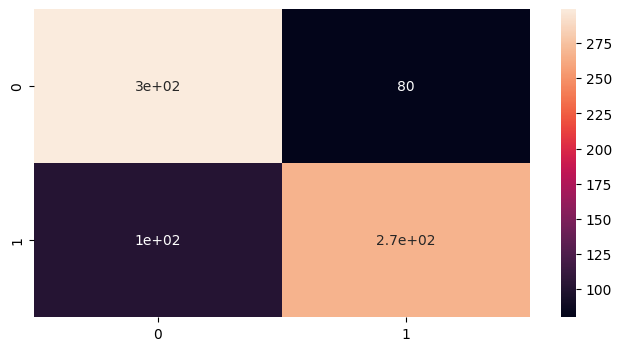

In [80]:
sns.heatmap(cm, annot = True)

In [81]:
precision_score(y_test1, lr1.predict(X_test1))*100

76.94524495677233

In [82]:
recall_score(y_test1, lr1.predict(X_test1))*100

72.35772357723577

In [83]:
f1_score(y_test1, lr1.predict(X_test1))*100

74.58100558659218

In [84]:
from sklearn.naive_bayes import BernoulliNB

In [85]:
bnb = BernoulliNB()
bnb.fit(X_train1,y_train1)

BernoulliNB()

In [86]:
bnb.score(X_test1,y_test1)*100

65.9090909090909

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dt = DecisionTreeClassifier()
dt.fit(X_train1,y_train1)

DecisionTreeClassifier()

In [89]:
dt.score(X_test1,y_test1)*100

71.12299465240642

In [90]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [91]:
x2 = dummy_df1[['PhoneService_Yes','MultipleLines_Yes','StreamingMovies_Yes','InternetService_Fiber optic','PaymentMethod_Electronic check','tenure']]
y2 = dummy_df1['Churn']

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, random_state = 50, test_size = 0.25)

In [94]:
# ms = MinMaxScaler()
# X_train2 = ms.fit_transform(X_train2)
# X_test2 = ms.transform(X_test2)

In [95]:
lr2 = LogisticRegression(random_state = 42)
lr2.fit(X_train2,y_train2)

LogisticRegression(random_state=42)

In [96]:
round(lr2.score(X_test2,y_test2)*100, 2)

81.23

In [97]:
bnb1 = BernoulliNB()
bnb1.fit(X_train2,y_train2)

BernoulliNB()

In [98]:
bnb1.score(X_test2,y_test2)*100

75.31285551763366

In [99]:
# kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}

In [100]:
from sklearn.svm import SVC

In [101]:
sv = SVC(kernel = 'linear')
sv.fit(X_test2,y_test2)

SVC(kernel='linear')

In [102]:
sv.score(X_test2,y_test2)*100

80.88737201365188